This demo were derived from the article [Your First Neural Network in PyTorch](https://towardsdatascience.com/your-first-neural-network-in-pytorch-725631ae0fc)

In this demo, we will cover some basic theory of Artificial Neural Networks. The demo is structured as followd
1. Imports and Dataset
2. Train/Test Split
3. Defining a Neural Network Model
4. Model Training
5. Model Evaluation

#Imports and Dataset

For this simple example we’ll use only a couple of libraries:
- `Pandas`: for data loading and manipulation
- `Scikit-learn`: for train-test split
- `Matplotlib`: for data visualization
- `PyTorch`: for model training    

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

As for the dataset, the Iris dataset, it can be found on this [URL](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). Here’s how to import it in Pandas directly:

In [ ]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Name']
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


What we want to do now is to change, or remap, values from the Name column to something numeric — let’s say 0, 1, 2. Here’s how to do so:

In [ ]:
mappings = {
   'Iris-setosa': 0,
   'Iris-versicolor': 1,
   'Iris-virginica': 2
}
iris['Name'] = iris['Name'].apply(lambda x: mappings[x])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Train/test split

In this section, we’ll use the `Scikit-Learn` library to do a train/test split. Afterward, we’ll convert split data from `Numpy` arrays to PyTorch tensors.

Let’s see how.

To start out, we need to split the Iris dataset into features and target — or X and y. The column `name` will be the target variable and everything else will be a feature (or predictor).

I will also be using a random seed, so you are able to reproduce the results. Here’s the code:

In [ ]:
X = iris.drop('Name', axis=1).values
y = iris['Name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Defining a Neural Network Model

As for the architecture of the model, it will be very simple. Let’s see how the network will be structured:
1. **Fully Connected Layer** (4 input features (number of features in X), 16 output features (arbitrary))
2. **Fully Connected Layer** (16 input features (number of output features from the previous layer), 12 output features (arbitrary))
3. **Output Layer** (12 input features (number of output features from the previous layer), 3 output features (number of distinct classes))

And that’s pretty much it. Besides that, we’ll use Sigmoid for our activation function. Let’s see how to implement this in code:

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=16)
        self.fc2 = nn.Linear(in_features=16, out_features=12)
        self.output = nn.Linear(in_features=12, out_features=3)
 
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.output(x)
        return x

PyTorch uses this object-orientated way of declaring models, and it’s fairly intuitive. In the constructor, you will define all the layers and their architecture, and in the `forward()` method you will define a forward pass.

As simple as that.

Let’s now make an instance of the model and verify that its architecture matches the one we specified above:

In [ ]:
model = ANN()
model

ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)

Great. Before we can train the model, there’s a couple of more things we need to declare:

- **Criterion**: basically how we measure loss, we’ll use CrossEntropyLoss
- **Optimizer**: optimization algorithm, we’ll use Adam with a learning rate of 0.01

Here’s how to implement it in code:

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Model Training

This part will also be extremely simple. We’ll train the model for 100 epochs, keeping track of time and loss. Every 10 epochs we’ll output to the console the current status — indicating on which epoch are we and what’s the current loss.

Here’s the code:

In [ ]:
%%time
epochs = 100
loss_arr = []
for i in range(epochs):
    y_hat = model.forward(X_train)
    loss = criterion(y_hat, y_train)
    loss_arr.append(loss)

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.128144383430481
Epoch: 10 Loss: 1.0462214946746826
Epoch: 20 Loss: 0.8961266279220581
Epoch: 30 Loss: 0.6472681164741516
Epoch: 40 Loss: 0.4672750234603882
Epoch: 50 Loss: 0.36794188618659973
Epoch: 60 Loss: 0.2839801609516144
Epoch: 70 Loss: 0.2223811000585556
Epoch: 80 Loss: 0.17964239418506622
Epoch: 90 Loss: 0.1478772908449173
CPU times: user 80.7 ms, sys: 3.02 ms, total: 83.7 ms
Wall time: 87.3 ms


If you’re wondering what these last 3 lines are doing, the answer is simple — backpropagation — ergo updating of weights and biases so the model can actually “learn”.

If plain numbers mean absolutely nothing to you, here’s a visualization of our loss (epoch number on the x-axis and loss on the y-axis):

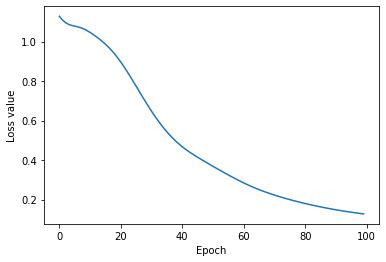

In [ ]:
plt.plot(loss_arr)
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()

# Model Evaluation

In the evaluation process, we want to somehow keep track of predictions made by the model. We’ll need to iterate over the X_test and make a prediction, and then later compare it to the actual value.

We will use `torch.no_grad()` here because we’re just evaluating — there’s no need to update weights and biases.

Anyway, here’s the code:

In [ ]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

The predictions are now stored in the `preds` array. We can now make a Pandas DataFrame with the following 3 attributes:

- `Y`: actual value
- `YHat`: predicted value
- `Correct`: flag, 1 indicating Y and YHat match, 0 otherwise

Here’s the code:

In [ ]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df.head()

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,1,1


In [ ]:
print('Accuracy', df['Correct'].sum() / len(df))

Accuracy 1.0
